In [2]:
import sys
# Define relative path.
sys.path.append("python")

In [3]:
import itertools
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from python.sampling_trajectory import morris_trajectory
from python.sampling_trajectory import simple_stairs
from python.sampling_trajectory import campolongo_2007
from python.sampling_trajectory import intermediate_ge_menendez_2014
from python.sampling_trajectory import final_ge_menendez_2014
from python.sampling_trajectory import distance_matrix
from python.sampling_trajectory import total_distance

In [4]:
def bar_plot(input_par_array):
    new_list = input_par_array.reshape(-1, 1).tolist()
    merged = pd.Series(itertools.chain.from_iterable(new_list))
    vc = merged.value_counts().sort_index()
    vc /= float(vc.sum())
    assert vc.sum() > 0.999
    ax = vc.plot(kind='bar')
    fig = ax.get_figure()
    fig.autofmt_xdate()

In [9]:
# Create list of n_traj_sample trajectories

n_inputs = 4
n_levels = 6
n_traj_sample = 20
sample_traj_list = list()
for traj in range(0, n_traj_sample):
    seed = 123 + traj
    m_traj, _ = morris_trajectory(n_inputs, n_levels, seed=seed)
    sample_traj_list.append(m_traj)

simple_morris_sample = np.vstack(sample_traj_list)
simple_pairs_dist_matrix = distance_matrix(sample_traj_list)

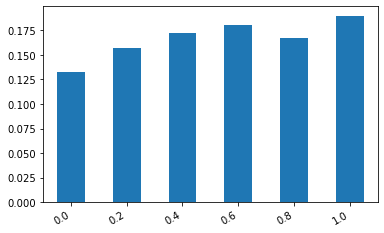

In [10]:
bar_plot(simple_morris_sample)

0.3645331859588623


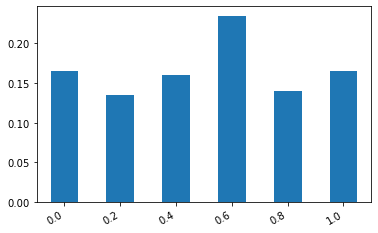

In [11]:
"""Experiment Final Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

final_ge_menendez_2014_array, _, final_gm14_pairs_dist_matrix = final_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)
bar_plot(final_ge_menendez_2014_array)

0.1521472930908203


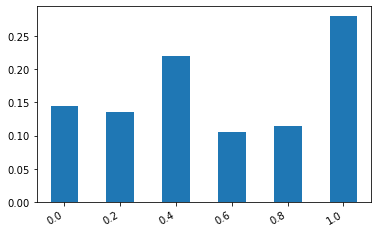

In [12]:
"""Experiment Intermediate Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

intermediate_ge_menendez_2014_array, _, intermediate_gm14_pairs_dist_matrix = intermediate_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)
bar_plot(intermediate_ge_menendez_2014_array)

11.137672424316406


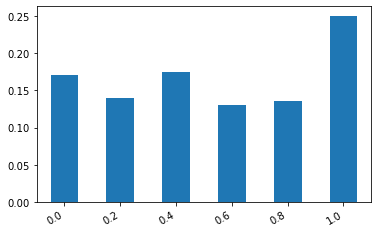

In [13]:
"""Experiment Campolongo (2007)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

campolongo_2007_array, _, c07_pairs_dist_matrix = campolongo_2007(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)
bar_plot(campolongo_2007_array)

In [14]:
# compare total distances
final_gm14_total_distance = total_distance(final_gm14_pairs_dist_matrix)
intermediate_gm14_total_distance = total_distance(intermediate_gm14_pairs_dist_matrix)
c07_gm14_total_distance = total_distance(c07_pairs_dist_matrix)
simple_total_distance = total_distance(simple_pairs_dist_matrix)

print(final_gm14_total_distance)
print(intermediate_gm14_total_distance)
print(c07_gm14_total_distance)
print(simple_total_distance/20)

106.80461767455448
115.53732203925648
115.59044470165043
10.996769935566109
